NAME: OLUWOLE AYOMIDE RHODA, ID: 1485ba305ac1f000

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Data_for_UCI_named.csv")

In [3]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
X = data.drop(columns='stab')
y = data['stabf']

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [6]:
from sklearn.metrics import recall_score

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.metrics import precision_score

In [9]:
from sklearn.metrics import f1_score

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_train.stabf = encoder.fit_transform(x_train.stabf)
x_test.stabf = encoder.transform(x_test.stabf)

In [12]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 527.6 kB/s eta 0:00:00m eta 0:00:010:00:02
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
You should consider upgrading via the '/home/rhodayo/Downloads/ENTER/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_new, y_new = smote.fit_resample(x_train, y_train)

In [13]:
pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 329.0 kB/s eta 0:00:00m eta 0:00:010:00:01
You should consider upgrading via the '/home/rhodayo/Downloads/ENTER/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [16]:
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_new = DataFrame(x_train_new, columns=x_train.columns)
normalised_data = scaler.fit_transform(x_train_new.drop(columns=['stabf']))
normalised_data= pd.DataFrame(normalised_data, columns=x_train_new.drop(columns=['stabf']).columns)
normalised_data['stabf'] = x_train_new['stabf']

In [17]:
x_test = x_test.reset_index(drop=True)
normalised_testdata = scaler.transform(x_test.drop(columns=['stabf']))
normalised_testdata = pd.DataFrame(normalised_testdata, columns=x_test.drop(columns=['stabf']).columns)
normalised_testdata['stabf'] = x_test['stabf']

In [19]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_predict_randfor=model.predict(x_test)

from sklearn import metrics
print(accuracy_score(y_test,y_predict_randfor))

1.0


In [20]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_features=4, random_state=0)
classify = ExtraTreesClassifier(n_estimators=100, random_state=1)
classify.fit(X, y)

ExtraTreesClassifier(random_state=1)

In [21]:
y_predict_xtc=model.predict(x_test)
from sklearn import metrics
print(accuracy_score(y_test,y_predict_xtc))

1.0


In [22]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

In [25]:
mdl = lgb.LGBMClassifier(random_state=1)
mdl.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.0625608	valid_0's binary_logloss: 0.062289
[40]	training's binary_logloss: 0.00819965	valid_0's binary_logloss: 0.00816517
[60]	training's binary_logloss: 0.00110506	valid_0's binary_logloss: 0.00110044
[80]	training's binary_logloss: 0.00014947	valid_0's binary_logloss: 0.000148844
[100]	training's binary_logloss: 2.0227e-05	valid_0's binary_logloss: 2.01423e-05


/home/rhodayo/Downloads/ENTER/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(random_state=1)

In [26]:
print('Training accuracy {:.4f}'.format(mdl.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(mdl.score(x_test,y_test)))

Training accuracy 1.0000
Testing accuracy 1.0000


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

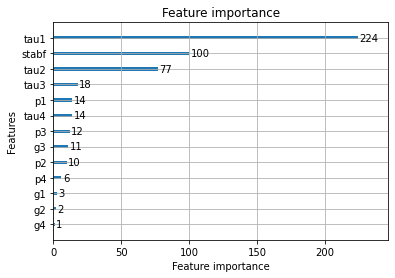

In [27]:
lgb.plot_importance(mdl)